# Fitting Code

Fit data from predator-prey spreadsheet, with error calculation for all predator species.


## Spreadsheet functions
Define functions for extracting information from spreadsheets.

In [1]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# These libraries allow us to read and write excel spreadsheets
import ipysheet as xl
import openpyxl
# 
def findCellString(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target string, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellString, "alphabet"):
        findCellString.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                   "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                   "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                   "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                   "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                   "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                   "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                   "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellString.alphabet: 
            cell = "{}{}".format(col, row)
            if sheet[cell].value == target:
                targetCell.append(cell)
    return targetCell
# 
def findCellValue(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target value, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellValue, "alphabet"):
        findCellValue.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                  "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                  "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                  "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                  "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                  "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                  "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                  "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
        findCellValue.tol = 1E-12
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellValue.alphabet: 
            cell = "{}{}".format(col, row)
            try:
                val = float(sheet[cell].value)
                if np.abs(float(sheet[cell].value) - target) < findCellValue.tol:
                    targetCell.append(cell)
            except:
                continue
    return targetCell
#
def cellInds(cell):
    '''
    Given the row and column of a cell in an excel spreadsheet, return its indices.
    Only works for columns up to BZ!
    '''
    if not hasattr(cellInds, "alphabet"):
        cellInds.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                             "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                             "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                             "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                             "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                             "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                             "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                             "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    number = ''
    for s in cell:
        if s.isdigit():
            number += s
    letters = ''
    for s in cell:
        if s.isalpha():
            letters += s
#
    try:
        col = cellInds.alphabet.index(letters) + 1
        row = int(number)
    except:
        col = -1
        row = -1
    return row, col
# 
# Create list of column values
def colList(sheet, col, minRow, maxRow):
    '''
    Given the sheet name in an excel spreadsheet, the required column, return a list  of all the values
    in the column between the minimum and maximum row numbers.
    '''
    colVals = []
    for row in range(minRow, maxRow):
        colVals.append(sheet.cell(row, col).value) 
    #
    return colVals
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 14:12:52.560046
 
Date and time 2020-04-28 14:12:53.713178
Time since last check is 0:00:01.153132


## Load spread sheet

Load spread sheet and test spreadsheet functions.

In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import os
import pandas as pd
import numpy as np
#
# Open Predator-Prey (PP) spreadsheet (data_only = True means values in cells read, not formulae)
PPbook = openpyxl.load_workbook('Predator-Prey-DB.xlsx', data_only = True)
PPnames = PPbook.sheetnames
print("Predator-Prey sheet names are:\n",PPnames)
PPsheet = PPbook['Land']
print("Active is",PPsheet)
#
print(" ")
print("Test findCellString")
findString = 'African Predators vs Prey (>5kg) Biomass'
print("findCellString(PPsheet, '" + findString +"') =", findCellString(PPsheet, findString))
print(" ")
print("Test findCellValue")
findValue = 10.69
print("findCellValue(PPsheet, " + str(findValue) +") =", findCellValue(PPsheet, findValue))
print(" ")
print("Test cellInds")
findCell = 'AA137'
print("cellInds(",findCell,") =", cellInds(findCell))
findCell = 'AA7'
print("cellInds(",findCell,") =", cellInds(findCell))
row, col = cellInds(findCell)
print("PPsheet(",row,",",col,").value =",PPsheet.cell(row, col).value)
print(" ")
print("Test colList")
column = 30 # column AD
rowTop = 74
rowBot = 119 + 1
print("colList(PPsheet,",column,",",rowTop,",",rowBot,")\n", colList(PPsheet, column, rowTop, rowBot))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))

Date and time  2020-04-28 14:12:53.730344
Predator-Prey sheet names are:
 ['Refs', 'eco', 'ind', 'Land', 'Averages Data', 'Aqua']
Active is <Worksheet "Land">
 
Test findCellString
findCellString(PPsheet, 'African Predators vs Prey (>5kg) Biomass') = ['A4', 'A260', 'A281']
 
Test findCellValue
findCellValue(PPsheet, 10.69) = ['D290']
 
Test cellInds
cellInds( AA137 ) = (137, 27)
cellInds( AA7 ) = (7, 27)
PPsheet( 7 , 27 ).value = White Rhino
 
Test colList
colList(PPsheet, 30 , 74 , 120 )
 [42.9, 550, 70, 267, 4540, 2194.02986333333, 3000, 2780, None, 5605.49, 98, 3500, 3750, 2797, 627, 3000, 35, 95, 499.333333333333, 1993.2, None, None, 154, 127, 28, None, 56, 185.125, 105.7, 105.7, 32, 0.1, 398, 1450, 6.2, 30, 45, 5027, 15000, 34200, 13420, 5872, 3737, 400, 100, 185]
 
Date and time 2020-04-28 14:13:07.662920


## Perform error analysis for multiple species

Now calculate reasonable errors for predator biomass density. 

For a given species $i$ (e.g. lions), the biomass per unit area, $b_i$, is given by:

$$b_i = \frac{n_i m_i}{A}.$$

The biomass per unit area for all predator species is: 

\begin{align}
B &= b_1 + b_2 + \dots \\
  &= \frac{n_1 m_1}{A} + \frac{n_2 m_2}{A} + \dots
\end{align}

This means the error on $B$ is:

\begin{align}
\Delta B &= \sqrt{ \left( \frac{\partial B}{\partial n_1} \Delta n_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_1} \Delta m_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial n_2} \Delta n_2 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_2} \Delta m_2 \right)^2 + \dots +
                   \left( \frac{\partial B}{\partial A} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{n_1 m_1 + n_2 m_2 +\dots}{A^2} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{B}{A} \Delta A \right)^2 } \\
         &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

## Calculate biomass density and its errors for predators

# HYENA COMBINED
Altered so that spotted hyena and brown hyena abdundances are seperate


In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# There are two hyena species
# Abundance data starts and finishes at: 
cPredBegLeft1, cPredBegRight1 = 'G74', 'G74'
#
# Animal mass data cells
cPredMassLeft1, cPredMassRight1 = 'G71', 'G71'
#
# Find beginning row and column indices and number of predator columns
nPredRowTop1, nPredColLeft1 = cellInds(cPredBegLeft1)
nPredRowTop1, nPredColRight1 = cellInds(cPredBegRight1)
nPredCols1 = nPredColRight1 - nPredColLeft1 + 1
print(" ")
print("nPredColRight1",nPredColRight1,"nPredColLeft1",nPredColLeft1,"nPredCols1",nPredCols1)
#
# Set row at which data for all prey and predators ends
botRow1 = 119
#
# Find number of rows
nPredRowBot1 = botRow1 + 1
nPredRows1 = nPredRowBot1  - nPredRowTop1
print(" ")
print("nPredRowBot",nPredRowBot1,"nPredRowTop",nPredRowTop1,"nPredCols",nPredRows1)
#
# Locate predator mass data
nPredMassTop1, nPredMassLeft1 = cellInds(cPredMassLeft1)
nPredMassTop1, nPredMassRight1 = cellInds(cPredMassRight1)
nPredMassBot1 = nPredMassTop1 + 1
#
# Get predator abundances and store in lists
numPredList1 = []
massPredList1 = []
for pred in range(0, nPredCols1):
    theseNumbers1 = colList(PPsheet, nPredColLeft1 + pred, nPredRowTop1, nPredRowBot1)
    numPredList1.append(theseNumbers1)
    thisMass1 = colList(PPsheet, nPredMassLeft1 + pred, nPredMassTop1, nPredMassBot1)
    massPredList1.append(thisMass1[0])
#
# Store this data in numpy arrays.
numPredArr1 = np.array(numPredList1).astype(float)
numPredErr1 = np.sqrt(numPredArr1)
massPredArr1 = np.array(massPredList1).astype(float)
#
# Add error on individual mass (guess)
massErrFactor1 = 0.2
massPredErr1 = massErrFactor1*massPredArr1
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("SPOTTED HYENA array")
print("Index\t mass\t first",nPrintArr,"numbers")
for pred in range(0, nPredCols1):
    print(f"{pred:d}\t {massPredArr1[pred]:.1f}\t {numPredArr1[pred, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")

#----------------------------------------------------------------

# Get information from Predator-Prey workbook
# Look at SE Africa
# There are two hyena species
# Abundance data starts and finishes at: 
cPredBegLeft2, cPredBegRight2 = 'J74', 'J74'
#
# Animal mass data cells
cPredMassLeft2, cPredMassRight2 = 'J71', 'J71'
#
# Find beginning row and column indices and number of predator columns
nPredRowTop2, nPredColLeft2 = cellInds(cPredBegLeft2)
nPredRowTop2, nPredColRight2 = cellInds(cPredBegRight2)
nPredCols2 = nPredColRight2 - nPredColLeft2 + 1
print(" ")
print("nPredColRight1",nPredColRight2,"nPredColLeft1",nPredColLeft2,"nPredCols1",nPredCols2)
#
# Set row at which data for all prey and predators ends
botRow2 = 119
#
# Find number of rows
nPredRowBot2 = botRow2 + 1
nPredRows2 = nPredRowBot2  - nPredRowTop2
print(" ")
print("nPredRowBot",nPredRowBot2,"nPredRowTop",nPredRowTop2,"nPredCols",nPredRows2)
#
# Locate predator mass data
nPredMassTop2, nPredMassLeft2 = cellInds(cPredMassLeft2)
nPredMassTop2, nPredMassRight2 = cellInds(cPredMassRight2)
nPredMassBot2 = nPredMassTop2 + 1
#
# Get predator abundances and store in lists
numPredList2 = []
massPredList2 = []
for pred in range(0, nPredCols2):
    theseNumbers2 = colList(PPsheet, nPredColLeft2 + pred, nPredRowTop2, nPredRowBot2)
    numPredList2.append(theseNumbers2)
    thisMass2 = colList(PPsheet, nPredMassLeft2 + pred, nPredMassTop2, nPredMassBot2)
    massPredList2.append(thisMass2[0])
#
# Store this data in numpy arrays.
numPredArr2 = np.array(numPredList2).astype(float)
numPredErr2 = np.sqrt(numPredArr2)
massPredArr2 = np.array(massPredList2).astype(float)
#
# Add error on individual mass (guess)
massErrFactor2 = 0.2
massPredErr2 = massErrFactor2*massPredArr2
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("BROWN HYENA array")
print("Index\t mass\t first",nPrintArr,"numbers")
for pred in range(0, nPredCols2):
    print(f"{pred:d}\t {massPredArr2[pred]:.1f}\t {numPredArr2[pred, 0:nPrintArr]}")
    
massPredArrCom = massPredArr1 + massPredArr2    
print("Combined mass is ", massPredArrCom) #do i want combined, or is average better    

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 14:13:07.719622
 
nPredColRight1 7 nPredColLeft1 7 nPredCols1 1
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
SPOTTED HYENA array
Index	 mass	 first 5 numbers
0	 50.0	 [ 390. 2200.  814.  700.  350.]
 
 
nPredColRight1 10 nPredColLeft1 10 nPredCols1 1
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
BROWN HYENA array
Index	 mass	 first 5 numbers
0	 41.0	 [  nan 2100.   nan   nan   nan]
Combined mass is  [91.]
 
Date and time 2020-04-28 14:13:07.738291
Time since last check is 0:00:00.005084


## Area code can stay unchanged 
see below

In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# Set cell where area data starts
areaBeg = 'D74'
#
# Find beginning row and column indices
areaRowBeg, areaCol = cellInds(areaBeg)
areaRowEnd = botRow1 + 1
areaList = colList(PPsheet, areaCol, areaRowBeg, areaRowEnd)
print("areaList",areaList)
#
# Turn the lists into numpy arrays to make them easier to manipulate 
areaArr = np.array(areaList).astype(float)
#
# Identify array elements which contain the value NaN
print(" ")
print("Area \n",areaArr)
areaErr = 0.2*areaArr
print ("Error on area \n",areaErr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 14:13:07.760649
areaList [390, 74000, 16280, 5053, 960, 960, 14540, 14651, 9590, 4471, 1442, 18989, 18989, 18989, 18989, 18989, 84, 110, 1670, 1500, 3245, 3245, 122, 120, 117, 260, 260, 260, 260, 260, 81, 1, 500, 1978, 17, 300, 300, 43626, 25000, 25000, 25000, 25000, 25000, 1683, 1683, 2850]
 
Area 
 [  390. 74000. 16280.  5053.   960.   960. 14540. 14651.  9590.  4471.
  1442. 18989. 18989. 18989. 18989. 18989.    84.   110.  1670.  1500.
  3245.  3245.   122.   120.   117.   260.   260.   260.   260.   260.
    81.     1.   500.  1978.    17.   300.   300. 43626. 25000. 25000.
 25000. 25000. 25000.  1683.  1683.  2850.]
Error on area 
 [   78.  14800.   3256.   1010.6   192.    192.   2908.   2930.2  1918.
   894.2   288.4  3797.8  3797.8  3797.8  3797.8  3797.8    16.8    22.
   334.    300.    649.    649.     24.4    24.     23.4    52.     52.
    52.     52.     52.     16.2     0.2   100.    395.6     3.4    60.
    60.   8725.2  5000.   5000.   5000. 

Combine the above to get the biomass density for predators. 

The formulae are repeated here for convenience!

\begin{align}
B &= \frac{1}{A} \left( n_1 m_1 + n_2 m_2 + \dots \right) \\
\Delta B &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#SPOTTED HYENAS
# Cope with undefined entries. 
numPredArrC1 = np.nan_to_num(numPredArr1, nan = 0.0)
numPredErrC1 = np.nan_to_num(numPredErr1, nan = 0.0)
massPredArrC1 = np.nan_to_num(massPredArr1, nan = 0.0)
massPredErrC1 = np.nan_to_num(massPredErr1, nan = 0.0)
areaArrC1 = np.nan_to_num(areaArr, nan = 1.0)
areaErrC1 = np.nan_to_num(areaErr, nan = 1.0)
#
predBarr1 = np.zeros(nPredRows1)
predBerr1 = np.zeros(nPredRows1)
#
for r in range(0, nPredRows1):
    predBarr1[r] = np.sum(numPredArrC1[0:nPredCols1, r]*massPredArrC1[0:nPredCols1])/areaArrC1[r]
    predBerr1[r] = np.sqrt(np.sum((massPredArrC1[0:nPredCols1]*numPredErrC1[0:nPredCols1, r])**2) + 
                          np.sum((numPredArrC1[0:nPredCols1, r]*massPredErrC1[0:nPredCols1])**2) +
                                 (predBarr1[r]*areaErrC1[r])**2)/areaArr[r]
#
print('')
print("predBarr Spotted")
print(  predBarr1 )
print("predBerr Spotted")
print(predBerr1)
print(' ')

#-----------------------------------------------------------------------
#BROWN HYENAS
# Cope with undefined entries. 
numPredArrC2 = np.nan_to_num(numPredArr2, nan = 0.0)
numPredErrC2 = np.nan_to_num(numPredErr2, nan = 0.0)
massPredArrC2 = np.nan_to_num(massPredArr1, nan = 0.0)
massPredErrC2 = np.nan_to_num(massPredErr2, nan = 0.0)
areaArrC2 = np.nan_to_num(areaArr, nan = 1.0)
areaErrC2 = np.nan_to_num(areaErr, nan = 1.0)
#
predBarr2 = np.zeros(nPredRows2)
predBerr2 = np.zeros(nPredRows2)
#
for r in range(0, nPredRows2):
    predBarr2[r] = np.sum(numPredArrC2[0:nPredCols2, r]*massPredArrC2[0:nPredCols2])/areaArrC2[r]
    predBerr2[r] = np.sqrt(np.sum((massPredArrC2[0:nPredCols2]*numPredErrC2[0:nPredCols2, r])**2) + 
                          np.sum((numPredArrC2[0:nPredCols2, r]*massPredErrC2[0:nPredCols2])**2) +
                                 (predBarr2[r]*areaErrC2[r])**2)/areaArr[r]
#
print(' ')
print("predBarr Brown")
print(  predBarr2 )
print("predBerr Brown")
print(predBerr2)
print(' ')

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 14:13:07.794905

predBarr Spotted
[50.    1.49  2.5   6.93 18.23 16.41  1.72  4.25  0.47  8.29  2.6   7.9
  9.22  6.79  6.95  7.11  5.95  4.55 18.56 20.57  0.92  0.92  4.92 14.58
  4.27 60.58 62.52 45.96 34.42 76.92 17.28  0.    0.    5.33 25.   20.
 20.   15.    6.    8.59 10.32 17.9  16.4   5.94  2.08 17.54]
predBerr Spotted
[14.37  0.42  0.71  1.98  5.25  4.73  0.49  1.21  0.14  2.36  0.79  2.24
  2.61  1.92  1.97  2.02  2.53  1.93  5.3   5.88  0.29  0.29  1.99  4.81
  1.81 17.47 18.02 13.34 10.07 22.09  5.88  0.    0.    1.55 11.11  5.94
  5.94  4.24  1.7   2.43  2.92  5.07  4.64  1.73  0.64  4.99]
 
 
predBarr Brown
[0.   1.42 0.   0.   0.   0.   0.01 0.   0.89 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   7.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.59 0.59 0.  ]
predBerr Brown
[0.   0.37 0.   0.   0.   0.   0.01 0.   0.24 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

## Combining hyena datasets

In [6]:
import math

predBarrCombo = np.add(predBarr1, predBarr2)

print("Combined Hyena biomass ")
print(predBarrCombo)
print("")

predBerr1SQR = np.multiply(predBerr1,predBerr1)
predBerr2SQR = np.multiply(predBerr2,predBerr2)
predBerrCombo=np.sqrt(np.add(predBerr1SQR,predBerr2SQR))

print("Combined Hyena Error ")
print(predBerrCombo)



Combined Hyena biomass 
[50.    2.91  2.5   6.93 18.23 16.41  1.73  4.25  1.36  8.29  2.6   7.9
  9.22  6.79  6.95  7.11  5.95  4.55 18.56 20.57  0.92  0.92  4.92 14.58
  4.27 60.58 62.52 45.96 34.42 76.92 17.28  0.    7.5   5.33 25.   20.
 20.   15.    6.    8.59 10.32 17.9  16.4   6.54  2.67 17.54]

Combined Hyena Error 
[14.37  0.56  0.71  1.98  5.25  4.73  0.49  1.21  0.28  2.36  0.79  2.24
  2.61  1.92  1.97  2.02  2.53  1.93  5.3   5.88  0.29  0.29  1.99  4.81
  1.81 17.47 18.02 13.34 10.07 22.09  5.88  0.    2.12  1.55 11.11  5.94
  5.94  4.24  1.7   2.43  2.92  5.07  4.64  1.74  0.67  4.99]


## Calculate biomass density and its errors for prey
this doesn't need to be altered

In [15]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa. The 33 prey species are:
# Elephant, White Rhino, Hippo, Black Rhino, Giraffe, Buffalo, Eland, Zebra, Roan, Sable, Waterbuck, Wildebeest, Kudu, Oryx, Kongoni, 
# Topi/Tsessebe, Nyala, Bushpig, Warthog, Grant's Gazelle, Impala, Reedbuck, Bushbuck, Springbok, Thomson's Gazelle, Duiker, Baboon, 
# Oribi, Klipspringer, Steenbok, Grysbok, Dik-dik and Other.
#
# Note that Elephant, White Rhino, Hippo, Black Rhino and Giraffe are omitted from the calculation (too large to be preyed upan?).
#
# Abundance data starts and finishes at: 
#cPreyBegLeft, cPreyBegRight = 'S74', 'AI74' #30-250 kg
cPreyBegLeft, cPreyBegRight = 'Q74','AR74' #5-550 kg Paper
#
# Animal mass data cells
#cPreyMassLeft, cPreyMassRight = 'S71', 'AI71' #30-250
cPreyMassLeft, cPreyMassRight = 'Q71','AR71' #5-550 kg Paper
#
# Find beginning row and column indices and number of predator columns
nPreyRowTop, nPreyColLeft = cellInds(cPreyBegLeft)
nPreyRowTop, nPreyColRight = cellInds(cPreyBegRight)
nPreyCols = nPreyColRight - nPreyColLeft + 1
print(" ")
print("nPreyColRight",nPreyColRight,"nPreyColLeft",nPreyColLeft,"nPreyCols",nPreyCols)
#
# Set row at which data for all prey and predators ends
botRow = 119
#
# Find number of rows
nPreyRowBot = botRow + 1
nPreyRows = nPreyRowBot  - nPreyRowTop
print(" ")
print("nPredRowBot",nPredRowBot1,"nPredRowTop",nPredRowTop1,"nPredCols",nPredRows1)
#
# Locate predator mass data
nPreyMassTop, nPreyMassLeft = cellInds(cPreyMassLeft)
nPreyMassTop, nPreyMassRight = cellInds(cPreyMassRight)
nPreyMassBot = nPreyMassTop + 1
#
# Get predator abundances and store in lists
numPreyList = []
massPreyList = []
for prey in range(0, nPreyCols):
    theseNumbers = colList(PPsheet, nPreyColLeft + prey, nPreyRowTop, nPreyRowBot)
    numPreyList.append(theseNumbers)
    thisMass = colList(PPsheet, nPreyMassLeft + prey, nPreyMassTop, nPreyMassBot)
    massPreyList.append(thisMass[0])
#
# Store this data in numpy arrays.
numPreyArr = np.array(numPreyList).astype(float)
numPreyErr = np.sqrt(numPreyArr)
massPreyArr = np.array(massPreyList).astype(float)
#
# Add error on individual mass (guess)
massErrFactor = 0.2
massPreyErr = massErrFactor*massPreyArr
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("Prey array")
print("Index\t mass\t first",nPrintArr,"numbers")
for prey in range(0, nPreyCols):
    print(f"{prey:d}\t {massPreyArr[prey]:.1f}\t {numPreyArr[prey, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 15:01:38.487832
 
nPreyColRight 44 nPreyColLeft 17 nPreyCols 28
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
Prey array
Index	 mass	 first 5 numbers
0	 520.0	 [ 560.    5.   nan 2274. 1903.]
1	 380.0	 [ 137.2 1100.   493.   317.     nan]
2	 220.0	 [ 4059.9 21200.   9388.   1385.   1786. ]
3	 260.0	 [ nan 250.  29.  nan  nan]
4	 220.0	 [nan nan nan nan nan]
5	 180.0	 [ 35.1   nan   nan 360.  408. ]
6	 163.0	 [ 8307. 17500.  3478.   364.  1624.]
7	 170.0	 [ 220. 7350.  701. 2285. 1642.]
8	 162.0	 [  84. 7200. 3629.   nan   nan]
9	 125.0	 [ 102. 2100.  860.   nan   nan]
10	 108.0	 [nan nan nan nan nan]
11	 58.0	 [  nan   nan   nan  370. 9532.]
12	 70.0	 [ nan 200.  nan  nan 346.]
13	 55.0	 [  42.9  550.    70.   267.  4540. ]
14	 45.0	 [2054.   nan   nan   nan   nan]
15	 44.0	 [   85.8   400.     82.   6005.  10984. ]
16	 40.0	 [ 51.   5.  nan  nan 165.]
17	 35.0	 [ nan  nan  nan  nan 479.]
18	 32.0	 [   nan 21000.  7569.    nan    nan]
19	 18.0	 [396.  nan  n

In [16]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Cope with undefined entries. 
numPreyArrC = np.nan_to_num(numPreyArr, nan = 0.0)
numPreyErrC = np.nan_to_num(numPreyErr, nan = 0.0)
massPreyArrC = np.nan_to_num(massPreyArr, nan = 0.0)
massPreyErrC = np.nan_to_num(massPreyErr, nan = 0.0)
areaArrC = np.nan_to_num(areaArr, nan = 1.0)
areaErrC = np.nan_to_num(areaErr, nan = 1.0)
#
preyBarr = np.zeros(nPreyRows)
preyBerr = np.zeros(nPreyRows)
#
for r in range(0, nPreyRows):
    preyBarr[r] = np.sum(numPreyArrC[0:nPreyCols, r]*massPreyArrC[0:nPreyCols])/areaArrC[r]
    preyBerr[r] = np.sqrt(np.sum((massPreyArrC[0:nPreyCols]*numPreyErrC[0:nPreyCols, r])**2) + 
                          np.sum((numPreyArrC[0:nPreyCols, r]*massPreyErrC[0:nPreyCols])**2) +
                                 (preyBarr[r]*areaErrC[r])**2)/areaArr[r]
#
print("preyBarr",preyBarr)
print("preyBerr",preyBerr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 15:01:40.671527
preyBarr [ 7103.13   158.44   239.1    479.7   3500.45  5295.54   608.34   416.38
   257.89  2795.73  1423.63  1197.62  1428.99  1618.76  1205.7   1356.16
 10170.58  5983.36  4854.53  3928.64   262.36   303.91  3217.18  3601.
  2628.97 12945.83 15247.   13038.43 12307.81 13225.01  3497.3   1503.95
  2336.26  2414.02  6836.72   212.23  2018.02  2079.28  2020.12  2885.15
  2200.28  2000.5   1684.62  1116.33   174.27  3763.28]
preyBerr [1655.26   35.35   55.25  109.34  756.97 1189.65  142.49   91.55   65.16
  624.12  394.68  267.49  324.75  364.22  275.17  314.99 2806.25 1393.9
 1164.43  858.71   59.77   67.54  714.02  818.9   586.42 3155.79 3596.86
 2983.11 2844.35 3037.71  907.92  724.48  514.25  646.57 1837.09   49.01
  478.73  532.19  480.31  663.52  485.93  441.06  368.28  250.54   39.63
  941.01]
 
Date and time 2020-04-28 15:01:40.677801
Time since last check is 0:00:00.006274


## Fit data using errors for both predators and prey

Date and time  2020-04-28 15:14:28.240129
 
Number of points 46
 
preyBarr
 [ 7103.135   158.442   239.097   479.704  3500.447  5295.541   608.336
   416.382   257.886  2795.73   1423.626  1197.621  1428.995  1618.764
  1205.7    1356.163 10170.583  5983.364  4854.529  3928.642   262.357
   303.914  3217.184  3600.997  2628.974 12945.825 15247.004 13038.429
 12307.811 13225.006  3497.296  1503.954  2336.264  2414.023  6836.718
   212.233  2018.023  2079.282  2020.123  2885.152  2200.275  2000.496
  1684.618  1116.328   174.272  3763.285]
 
predBarr
 [50.     2.905  2.5    6.927 18.229 16.406  1.733  4.249  1.361  8.287
  2.601  7.899  9.216  6.788  6.949  7.109  5.952  4.545 18.563 20.567
  0.924  0.924  4.918 14.583  4.274 60.577 62.515 45.962 34.423 76.923
 17.284  0.     7.5    5.334 25.    20.    20.    15.     6.     8.586
 10.322 17.9   16.4    6.536  2.674 17.544]
 
xData			 yData
 8.87 +-  0.23		  3.91 +-  0.29
 5.07 +-  0.22		  1.07 +-  0.19
 5.48 +-  0.23		  0.92 +-  0.29
 6.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply


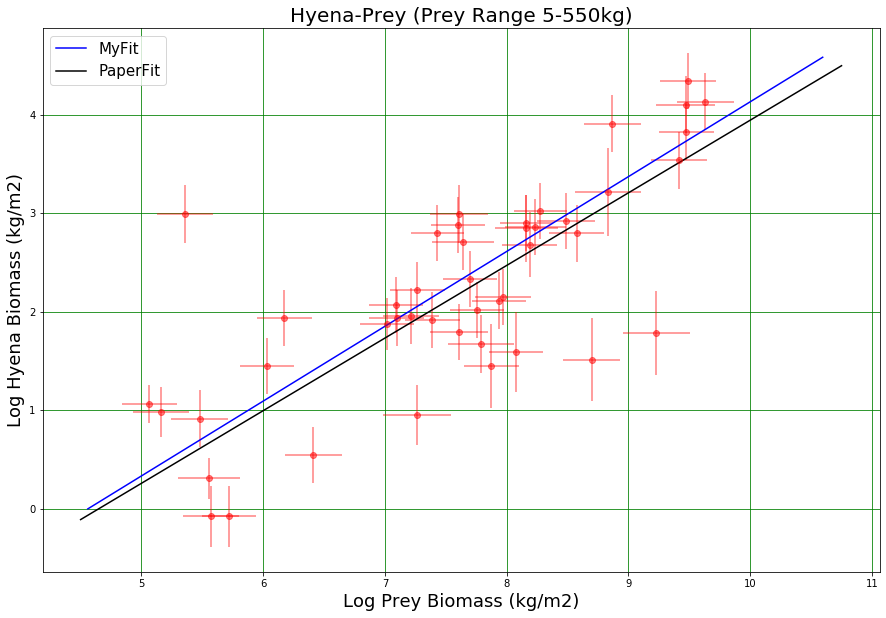

 
Date and time 2020-04-28 15:14:28.639156
Time since last check is 0:00:00.399027


In [21]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
import matplotlib.pyplot as plt
import numpy.ma as ma
#

# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
import sys
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
if nPredRows1 != nPreyRows:
    print(" ")
    print("Mismatch in number of locations for predators",nPredCols,"and prey",nPreyCols,"stop fit!")
    sys.exit()
#
nPoints = nPredRows1
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
print(" ")
print("Number of points",nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Transfer predator and prey data to fit arrays
print(" ")
print("preyBarr\n",preyBarr)
print(" ")
print("predBarr\n",predBarrCombo)
xData = np.log(preyBarr)
yData = np.log(predBarrCombo)
yData = np.nan_to_num(yData, posinf= 0, neginf =0, nan = 0.0)
#
# Add error guesses for predator and prey masses
xError = 1/preyBarr*preyBerr
yError = 1/predBarrCombo*predBerrCombo
yError = np.nan_to_num(yError, posinf = 0, nan =0.1)

#removing dud point
xData = np.delete(xData,31)
yData = np.delete(yData,31)
xError = np.delete(xError,31)
yError = np.delete(yError,31)

print(" ")
print("xData\t\t\t yData")
for n in range(0, nPoints-1):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
         # Plot data
    fig = plt.figure(figsize = (15, 10))
    plt.title('Hyena-Prey (Prey Range 5-550kg)', fontsize=20)
    plt.xlabel("Log Prey Biomass (kg/m2)", fontsize=18)
    plt.ylabel("Log Hyena Biomass (kg/m2)",fontsize=18)
    
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '', alpha =0.5)
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "MyFit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
#
# Paper fit
    PaperY= [-0.11,4.5]
    PaperX= [4.5,10.75]
    
    #PaperX= [3,10.5]
    #aperY=[0.72,6.26]
#
    plt.plot(PaperX, PaperY, color = 'k', linestyle = '-', label = "PaperFit", ) 
    plt.grid(color = 'g')
    plt.legend(fontsize=15)
    plt.show()
    
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 15:19:19.380689
 
Number of points 46
 
preyBarr
 [ 7103.135   158.442   239.097   479.704  3500.447  5295.541   608.336
   416.382   257.886  2795.73   1423.626  1197.621  1428.995  1618.764
  1205.7    1356.163 10170.583  5983.364  4854.529  3928.642   262.357
   303.914  3217.184  3600.997  2628.974 12945.825 15247.004 13038.429
 12307.811 13225.006  3497.296  1503.954  2336.264  2414.023  6836.718
   212.233  2018.023  2079.282  2020.123  2885.152  2200.275  2000.496
  1684.618  1116.328   174.272  3763.285]
 
predBarr
 [50.     2.905  2.5    6.927 18.229 16.406  1.733  4.249  1.361  8.287
  2.601  7.899  9.216  6.788  6.949  7.109  5.952  4.545 18.563 20.567
  0.924  0.924  4.918 14.583  4.274 60.577 62.515 45.962 34.423 76.923
 17.284  0.     7.5    5.334 25.    20.    20.    15.     6.     8.586
 10.322 17.9   16.4    6.536  2.674 17.544]
 
xData			 yData
 8.87 +-  0.23		  3.91 +-  0.29
 5.07 +-  0.22		  1.07 +-  0.19
 5.48 +-  0.23		  0.92 +-  0.29
 6.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply


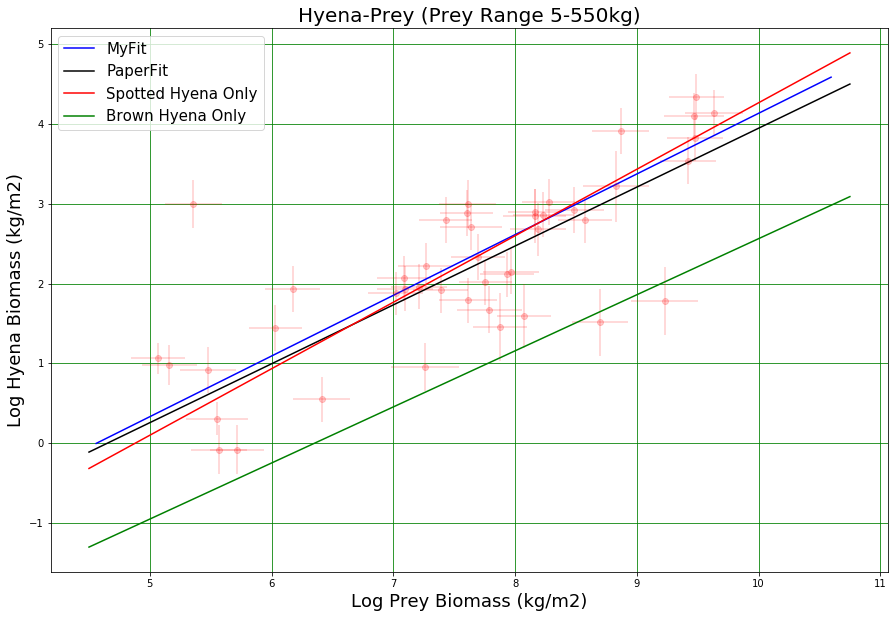

 
Date and time 2020-04-28 15:19:19.734295
Time since last check is 0:00:00.353606


In [23]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
import matplotlib.pyplot as plt
import numpy.ma as ma
#

# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
import sys
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
if nPredRows1 != nPreyRows:
    print(" ")
    print("Mismatch in number of locations for predators",nPredCols,"and prey",nPreyCols,"stop fit!")
    sys.exit()
#
nPoints = nPredRows1
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
print(" ")
print("Number of points",nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Transfer predator and prey data to fit arrays
print(" ")
print("preyBarr\n",preyBarr)
print(" ")
print("predBarr\n",predBarrCombo)
xData = np.log(preyBarr)
yData = np.log(predBarrCombo)
yData = np.nan_to_num(yData, posinf= 0, neginf =0, nan = 0.0)
#
# Add error guesses for predator and prey masses
xError = 1/preyBarr*preyBerr
yError = 1/predBarrCombo*predBerrCombo
yError = np.nan_to_num(yError, posinf = 0, nan =0.1)

#removing dud point
xData = np.delete(xData,31)
yData = np.delete(yData,31)
xError = np.delete(xError,31)
yError = np.delete(yError,31)

print(" ")
print("xData\t\t\t yData")
for n in range(0, nPoints-1):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
         # Plot data
    fig = plt.figure(figsize = (15, 10))
    plt.title('Hyena-Prey (Prey Range 5-550kg)', fontsize=20)
    plt.xlabel("Log Prey Biomass (kg/m2)", fontsize=18)
    plt.ylabel("Log Hyena Biomass (kg/m2)",fontsize=18)
    
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '', alpha =0.2)
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "MyFit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
#
# Paper fit
    PaperY= [-0.11,4.5]
    PaperX= [4.5,10.75]
    
    
    SpottedX=[4.5,10.75]
    SpottedY=[-0.315,4.890]
    
    BrownX=[4.5,10.75]
    BrownY=[-1.30,3.09]
#
    plt.plot(PaperX, PaperY, color = 'k', linestyle = '-', label = "PaperFit", ) 
    plt.plot(SpottedX, SpottedY, color = 'r', linestyle = '-', label = "Spotted Hyena Only", ) 
    plt.plot(BrownX, BrownY, color = 'g', linestyle = '-', label = "Brown Hyena Only", ) 
    
    plt.grid(color = 'g')
    plt.legend(fontsize=15)
    plt.show()
    
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))